## HR Employee Attrition

**Attrition** refers to the gradual but deliberate reduction in staff that occurs as employees leave a company and aren't replaced. Employees may leave voluntarily or involuntarily. Or, they may simply move from one department to another.

In [1]:
# https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 1. Explore the data

- Binary Classification.
- Employee attrition: Yes/No
- Significant class imbalance (about 16% attrition)

In [2]:
# build a DataFrame of counts + percents
dist = df['Attrition'].value_counts().to_frame('count')
dist['percent'] = df['Attrition'].value_counts(normalize=True).map('{:.2%}'.format)

print(dist)

           count percent
Attrition               
No          1233  83.88%
Yes          237  16.12%


### 2. Check for Missing values

In [3]:
# 2.1 Count missing values per column
missing_counts = df.isnull().sum()

# 2.2 Compute missing (%) per column
missing_pct = 100 * missing_counts / len(df)

# 2.3 Summarize in one table
missing_df = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_pct':   missing_pct
}).sort_values('missing_pct', ascending=False)

# 2.4 Filter to only columns with > 0 missing
df_missing = missing_df[missing_df['missing_count'] > 0].copy()

# 2.5 Print result or message
if df_missing.empty:
    print("✅ No columns have missing values.")
else:
    # format percentage
    df_missing['missing_pct'] = df_missing['missing_pct'].map(lambda x: f"{x:.2f}%")
    display(df_missing)

✅ No columns have missing values.


### 3. Check for Duplicates

In [4]:
# 3.1 Count total duplicate rows (keeping the first occurrence)
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# 3.2 If any duplicates exist, display them (showing all occurrences)
if num_duplicates > 0:
    dupes = df[df.duplicated(keep=False)]
    # Optionally sort by all columns to group identical rows together
    dupes = dupes.sort_values(by=list(df.columns))
    display(dupes)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


### 4. Data Type Verification and Conversion
- "EmployeeCount", "StandardHours" and "Over18" has single values and will be excluded.
- "EmployeeNumber" will also be excluded because it does not give any information.
- 4.1  - Verify that numerical variables (e.g., monthly income, years at company) are in the proper numerical format.
- 4.2 - Encode categorical variables.

In [5]:
# Numeric columns (int64/float64)   
numerical_columns = [
    "Age",
    "DailyRate",
    "DistanceFromHome",     
    "HourlyRate",    
    "MonthlyIncome",
    "MonthlyRate",  
    "YearsAtCompany",
    "TotalWorkingYears",  
    "YearsInCurrentRole", 
    "YearsWithCurrManager"
]

# Categorical columns (object/string)
categorical_columns = [
    "Attrition",
    "BusinessTravel",
    "Department",
    "Education",
    "EducationField",
    "EnvironmentSatisfaction",
    "Gender",
    "JobRole",
    "JobLevel",    
    "JobSatisfaction",
    "JobInvolvement",    
    "MaritalStatus",
    "NumCompaniesWorked",    
    "OverTime",
    "PerformanceRating",
    "PercentSalaryHike", 
    "RelationshipSatisfaction",    
    "StockOptionLevel",
    "WorkLifeBalance",
    "TrainingTimesLastYear", 
    "YearsSinceLastPromotion"  
]

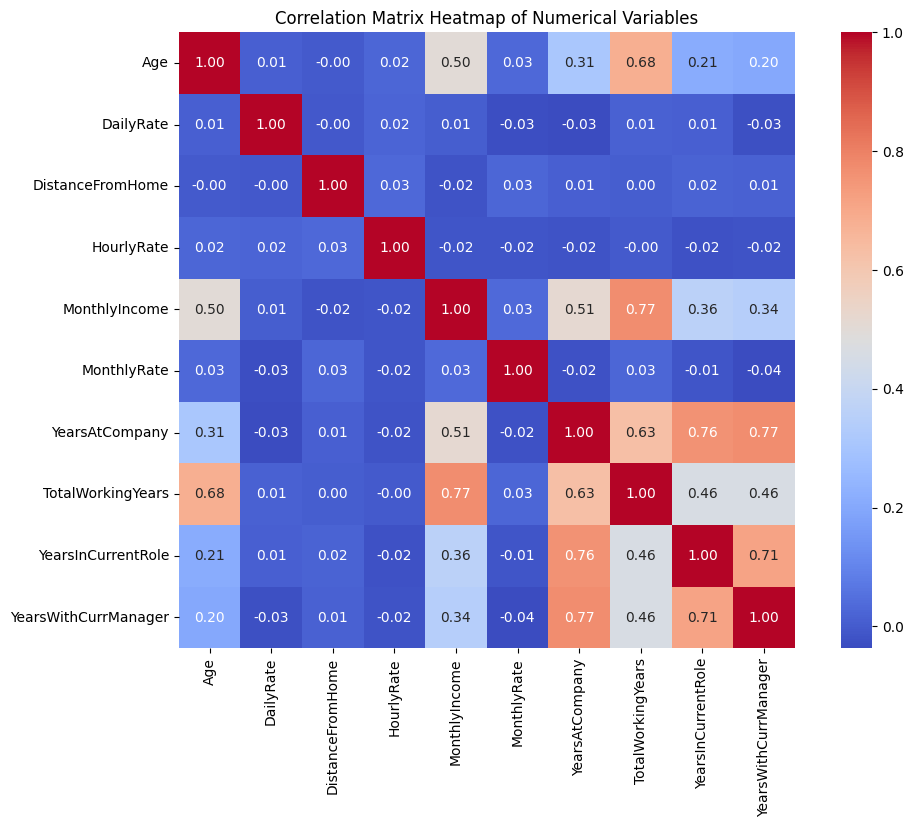

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for the selected numerical columns
corr_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix Heatmap of Numerical Variables")
plt.show()

In [7]:
# Remove columns:
# "YearsAtCompany",
# "TotalWorkingYears",  
# "YearsInCurrentRole", 
numerical_columns = [
    "Age",
    "DailyRate",
    "DistanceFromHome",     
    "HourlyRate",    
    "MonthlyIncome",
    "MonthlyRate",  
    "YearsWithCurrManager"
]

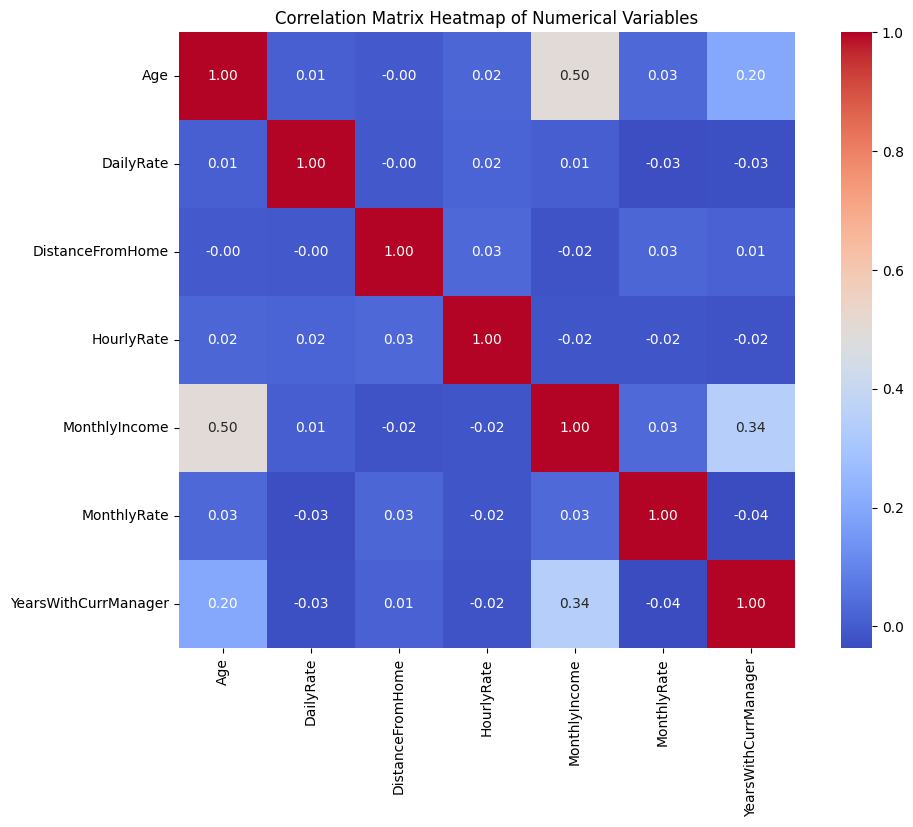

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for the selected numerical columns
corr_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix Heatmap of Numerical Variables")
plt.show()

In [9]:
# 4.1 Verify that numerical variables
def verify_numeric_format(df: pd.DataFrame, columns: list):
    """
    Checks each column in `columns` for non-numeric entries.
    Prints only those columns that have bad values;
    if all are fine, prints a success message.
    """
    invalid_columns = {}

    for col in columns:
        coerced = pd.to_numeric(df[col], errors='coerce')
        invalid_mask = coerced.isna() & df[col].notna()
        if invalid_mask.any():
            invalid_columns[col] = {
                'count': int(invalid_mask.sum()),
                'values': df.loc[invalid_mask, col].unique().tolist()
            }

    if invalid_columns:
        for col, info in invalid_columns.items():
            print(f"❌ Column '{col}' has {info['count']} non-numeric entries: {info['values']}")
    else:
        print("✅ All specified columns are numeric.")

verify_numeric_format(df, numerical_columns)

✅ All specified columns are numeric.


### 5. Visualize numerical columns distribution

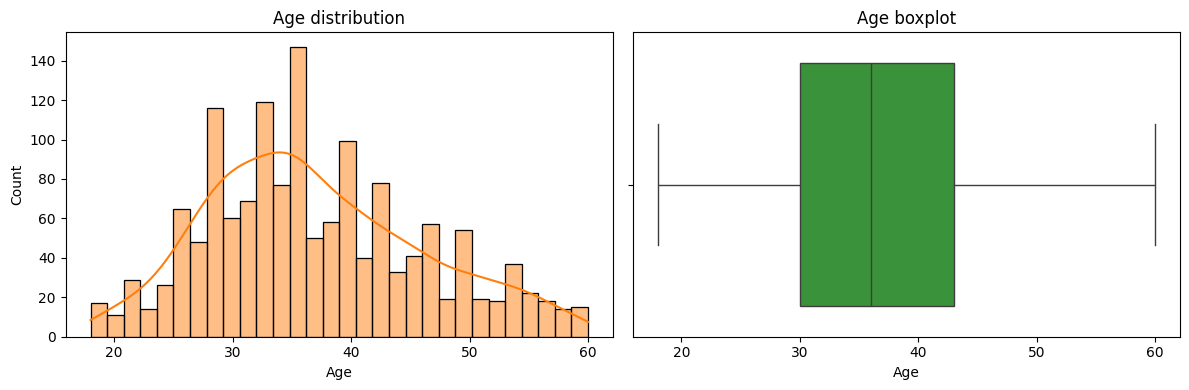

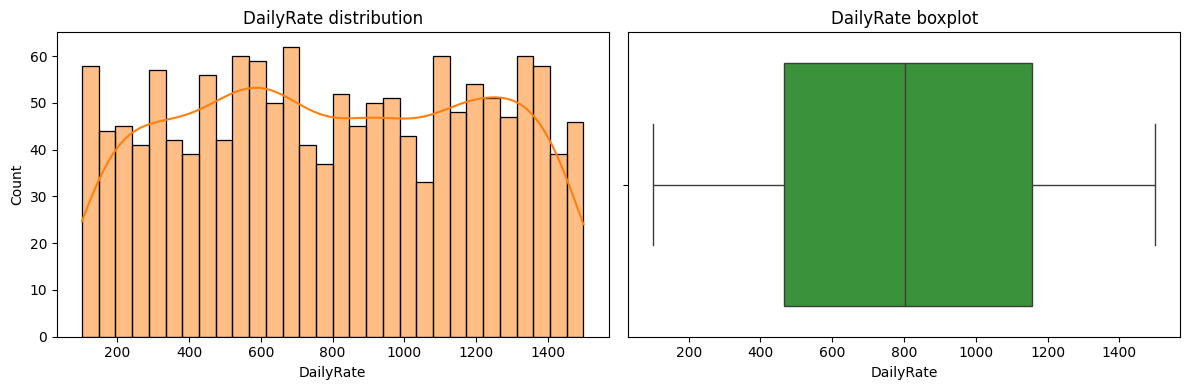

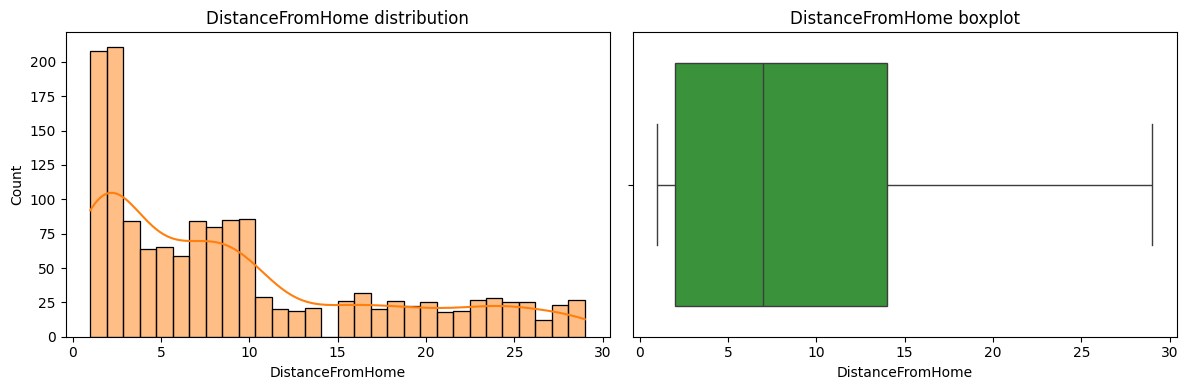

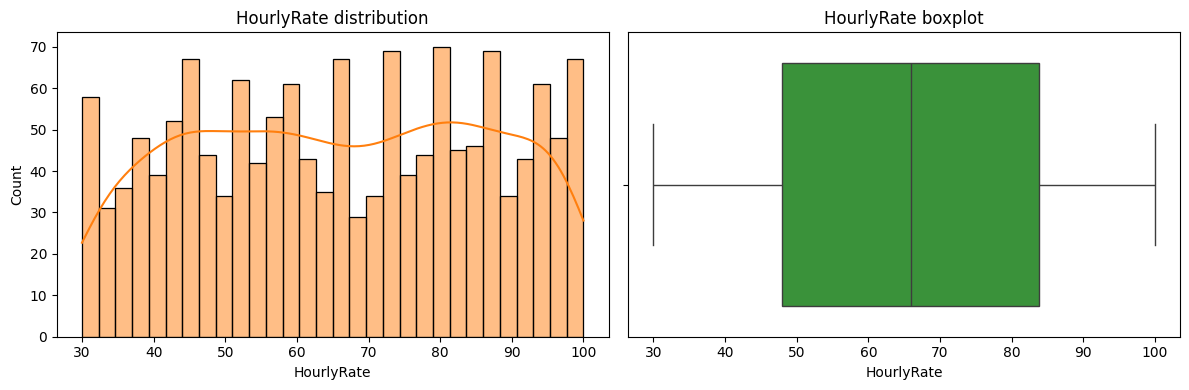

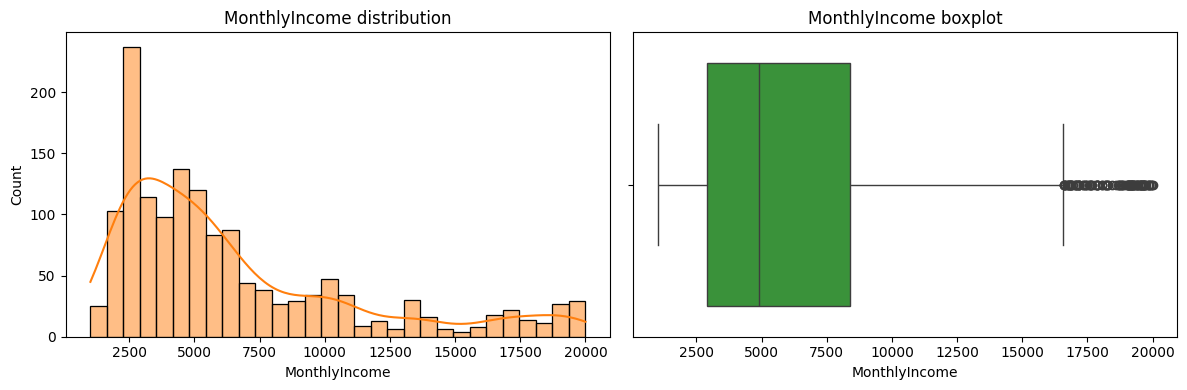

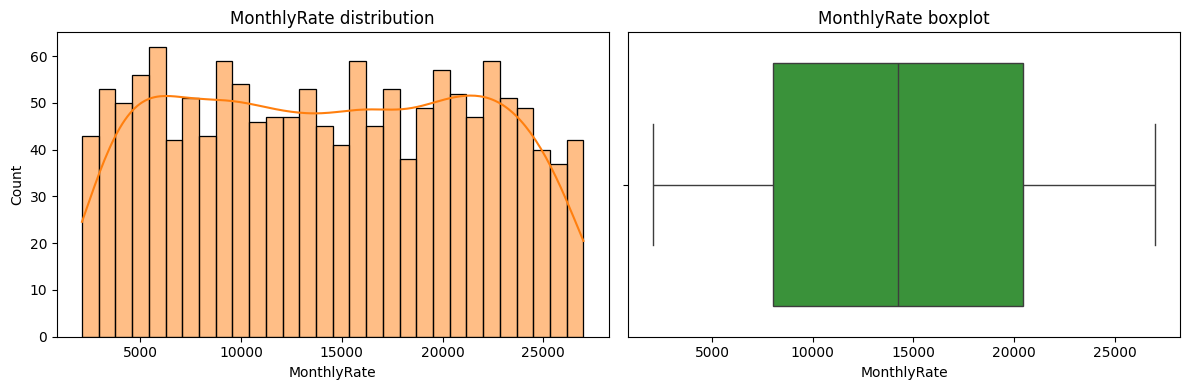

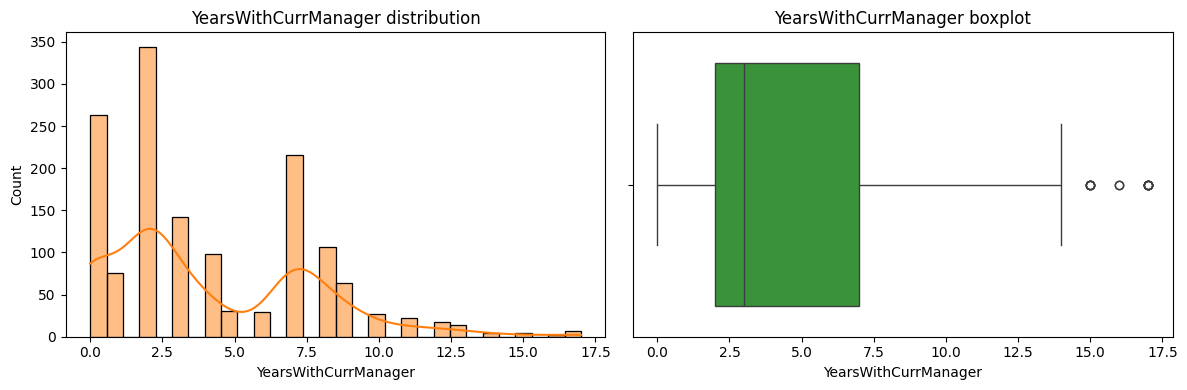

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_columns:
    # Plot distribution + boxplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(df[col], bins=30, kde=True, ax=ax1, color='C1')
    ax1.set_title(f"{col} distribution")

    sns.boxplot(x=df[col], ax=ax2, color='C2')
    ax2.set_title(f"{col} boxplot")

    plt.tight_layout()
    plt.show()

### 5. Outlier Detection and Handling

##### IQR (Interquartile Range) Method: At a Glance
- Uses the middle 50% of the data between the 25th percentile (Q1) and the 75th percentile (Q3) to define a “typical” range.

In [11]:
def detect_outliers_iqr(df, cols, factor=1.5):
    """
    Returns a dict mapping column -> list of row indices flagged as outliers.
    """
    outliers = {}
    for col in cols:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - factor*IQR, Q3 + factor*IQR
        mask = (df[col] < lower) | (df[col] > upper)
        outliers[col] = df.index[mask].tolist()
        # print(f"{col:25s}: {len(outliers[col]):4d} outliers")
    return outliers

iqr_outliers = detect_outliers_iqr(df, numerical_columns)

# Build a summary DataFrame for IQR method
summary = []
for col, inds in iqr_outliers.items():
    summary.append({
        "feature":        col,
        "n_outliers":     len(inds),
        "%_total_dataset":   round(len(inds)/len(df)*100, 2)
    })
outlier_summary = pd.DataFrame(summary).sort_values("n_outliers", ascending=False)
outlier_summary.head()

,feature,n_outliers,%_total_dataset
4,MonthlyIncome,114,7.76
6,YearsWithCurrManager,14,0.95
0,Age,0,0.00
2,DistanceFromHome,0,0.00
1,DailyRate,0,0.00


### Skewed data and Outliers handling

The extreme values can:

- Skew linear models and distance‐based learners
- Inflate variance, leading to less stable coefficients
- Give undue leverage to a few data points

Recommended Handling Strategy
 - Log‐transform heavily skewed features (e.g. MonthlyIncome)
 - Cap (“winsorize”) outliers at IQR bounds or at chosen percentiles
 - (Optional) Drop extreme rows if you believe they are data errors and you can afford the data loss
 - Use robust scaling for modeling

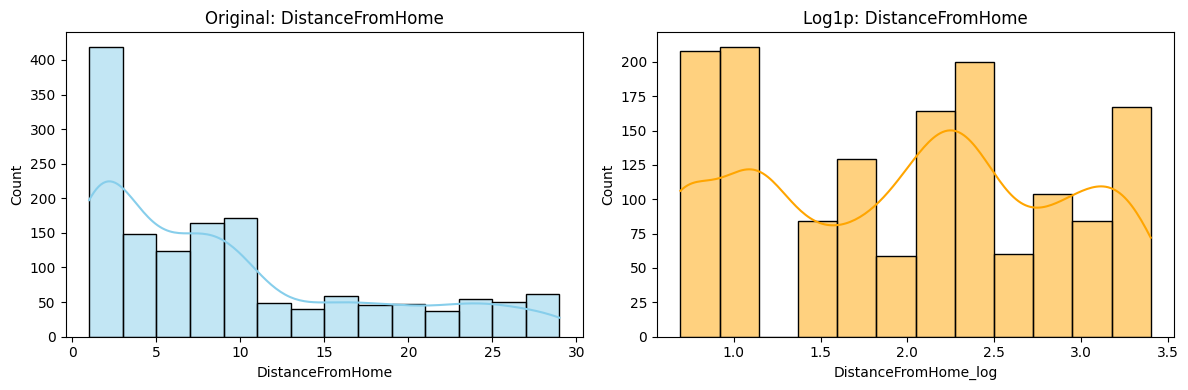

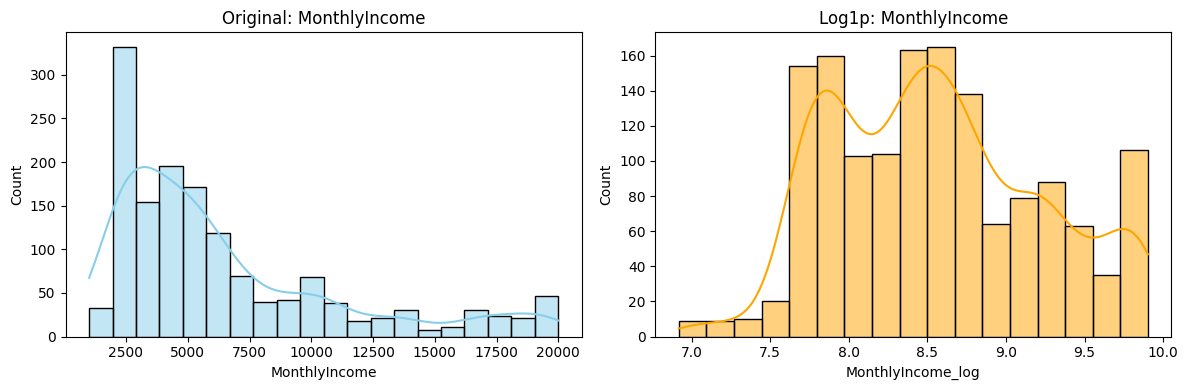

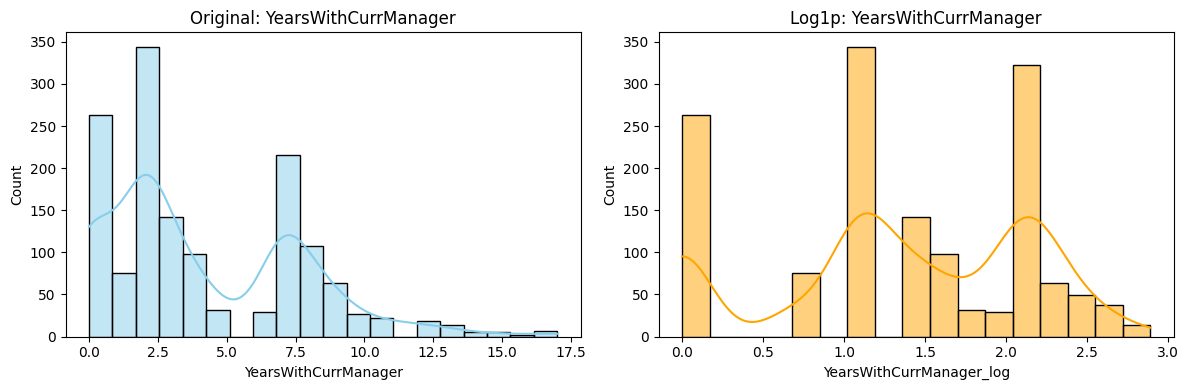

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ──────────────────────────────────────────────────────────────────────────────
# 1) List of numeric cols you want to log-transform 
skewed_columns = [
    "DistanceFromHome",
    "MonthlyIncome",
    "YearsWithCurrManager"
]

# ──────────────────────────────────────────────────────────────────────────────
# 2) Safe log1p transform
for feat in skewed_columns:
    # 3a) Fill missing values (example: with zero)
    clean = df[feat].fillna(0)

    # 3b) If any values ≤ 0, shift distribution so minimum is just above zero
    min_val = clean.min()
    if min_val <= 0:
        clean = clean - min_val + 1e-6

    # 3c) Apply log1p to the cleaned series
    df[f"{feat}_log"] = np.log1p(clean)

# ──────────────────────────────────────────────────────────────────────────────
# 3) (Optional) Drop the raw columns if you only want the log versions
# df.drop(columns=skewed_columns, inplace=True)

# ──────────────────────────────────────────────────────────────────────────────
# 4) Visualize Original vs. Log1p
for feat in skewed_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[feat], ax=axes[0], kde=True, color="skyblue")
    axes[0].set_title(f"Original: {feat}")

    sns.histplot(df[f"{feat}_log"], ax=axes[1], kde=True, color="orange")
    axes[1].set_title(f"Log1p: {feat}")

    plt.tight_layout()
    plt.show()

### 6. Feature generation

In [13]:
import numpy as np

def create_smart_features(df, eps=1e-6):
    """
    Generate a small set of targeted numerical features:      
      1) Pay‐rate ratios
      2) Manager‐tenure ratio
      3) One interaction (age × log‐income)
      4) Simple rate aggregator
    Returns a new DataFrame plus the list of new feature names.
    """
    df_new = df.copy()
    new_feats = []   

    # 1) Pay‐rate ratios
    df_new["rate_daily_hourly_ratio"] = df_new["DailyRate"] / (df_new["HourlyRate"] + eps)
    new_feats.append("rate_daily_hourly_ratio")
    df_new["income_rate_ratio"] = df_new["MonthlyIncome"] / (df_new["MonthlyRate"] + eps)
    new_feats.append("income_rate_ratio")

    # 2) Manager‐tenure ratio
    #   (assuming YearsAtCompany is still in df)
    df_new["manager_tenure_ratio"] = (
        df_new["YearsWithCurrManager"] / (df_new["YearsAtCompany"] + eps)
    )
    new_feats.append("manager_tenure_ratio")

    # 3) One meaningful interaction
    df_new["age_log_income_interaction"] = (
        df_new["Age"] * df_new["MonthlyIncome_log"]
    )
    new_feats.append("age_log_income_interaction")

    # 4) Simple sum of all rates
    df_new["sum_of_rates"] = (
        df_new["DailyRate"]
        + df_new["HourlyRate"]
        + df_new["MonthlyRate"]
    )
    new_feats.append("sum_of_rates")

    return df_new, new_feats


# ─ apply it ─
df, new_feats = create_smart_features(df)
numerical_columns += new_feats
print("New df.shape:", df.shape)

New df.shape: (1470, 43)


### 7. Scale numerical data

In [14]:
from sklearn.preprocessing import StandardScaler

# 1) build list of cols to scale: use f"{feat}_log" if it exists, else feat
scale_cols = [(f"{feat}_log" if f"{feat}_log" in df.columns else feat) for feat in numerical_columns]
print("Original columns to scale:", scale_cols)

# 2) build new column names prefixed with "scaled_"
scaled_cols = [f"scaled_{col}" for col in scale_cols]
print("New scaled column names:", scaled_cols)

# 3) fit the scaler and transform
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[scale_cols])

# 4) assign back to the DataFrame under the new names
df[scaled_cols] = scaled_array

# 5) quick sanity check: means ~ 0, stds ~ 1
df[scaled_cols].head()

Original columns to scale: ['Age', 'DailyRate', 'DistanceFromHome_log', 'HourlyRate', 'MonthlyIncome_log', 'MonthlyRate', 'YearsWithCurrManager_log', 'rate_daily_hourly_ratio', 'income_rate_ratio', 'manager_tenure_ratio', 'age_log_income_interaction', 'sum_of_rates']
New scaled column names: ['scaled_Age', 'scaled_DailyRate', 'scaled_DistanceFromHome_log', 'scaled_HourlyRate', 'scaled_MonthlyIncome_log', 'scaled_MonthlyRate', 'scaled_YearsWithCurrManager_log', 'scaled_rate_daily_hourly_ratio', 'scaled_income_rate_ratio', 'scaled_manager_tenure_ratio', 'scaled_age_log_income_interaction', 'scaled_sum_of_rates']


,scaled_Age,scaled_DailyRate,scaled_DistanceFromHome_log,scaled_HourlyRate,scaled_MonthlyIncome_log,scaled_MonthlyRate,scaled_YearsWithCurrManager_log,scaled_rate_daily_hourly_ratio,scaled_income_rate_ratio,scaled_manager_tenure_ratio,scaled_age_log_income_interaction,scaled_sum_of_rates
0,0.446350,0.742527,-1.505350,1.383138,0.219493,0.726020,0.547996,-0.209871,-0.429447,0.820959,0.403838,0.772260
1,1.322365,-1.297775,0.252002,-0.240677,-0.014600,1.488876,0.904924,-1.023840,-0.550256,0.422495,1.065185,1.414976
2,0.008343,1.414363,-1.031607,1.284725,-1.366318,-1.674841,-1.675043,0.154499,0.241275,-1.669441,-0.383318,-1.591394
3,-0.429664,1.461466,-0.695482,-0.486709,-0.868626,1.243211,-1.675043,1.285374,-0.645712,-1.669441,-0.593285,1.325007
4,-1.086676,-0.524295,-1.031607,-1.274014,-0.604032,0.325900,-0.311993,0.137546,-0.547230,1.319038,-1.053365,0.292613


### 8. Categorical values

In [15]:
# Count qunie values for every categorical column
for col in categorical_columns:
    if col in df.columns:
        unique_count = df[col].nunique()
        print(f"{col}: {unique_count}")
    else:
        print(f"{col}: Column not found in DataFrame")

Attrition: 2
BusinessTravel: 3
Department: 3
Education: 5
EducationField: 6
EnvironmentSatisfaction: 4
Gender: 2
JobRole: 9
JobLevel: 5
JobSatisfaction: 4
JobInvolvement: 4
MaritalStatus: 3
NumCompaniesWorked: 10
OverTime: 2
PerformanceRating: 2
PercentSalaryHike: 15
RelationshipSatisfaction: 4
StockOptionLevel: 4
WorkLifeBalance: 4
TrainingTimesLastYear: 7
YearsSinceLastPromotion: 16


#### Categorical values correlation

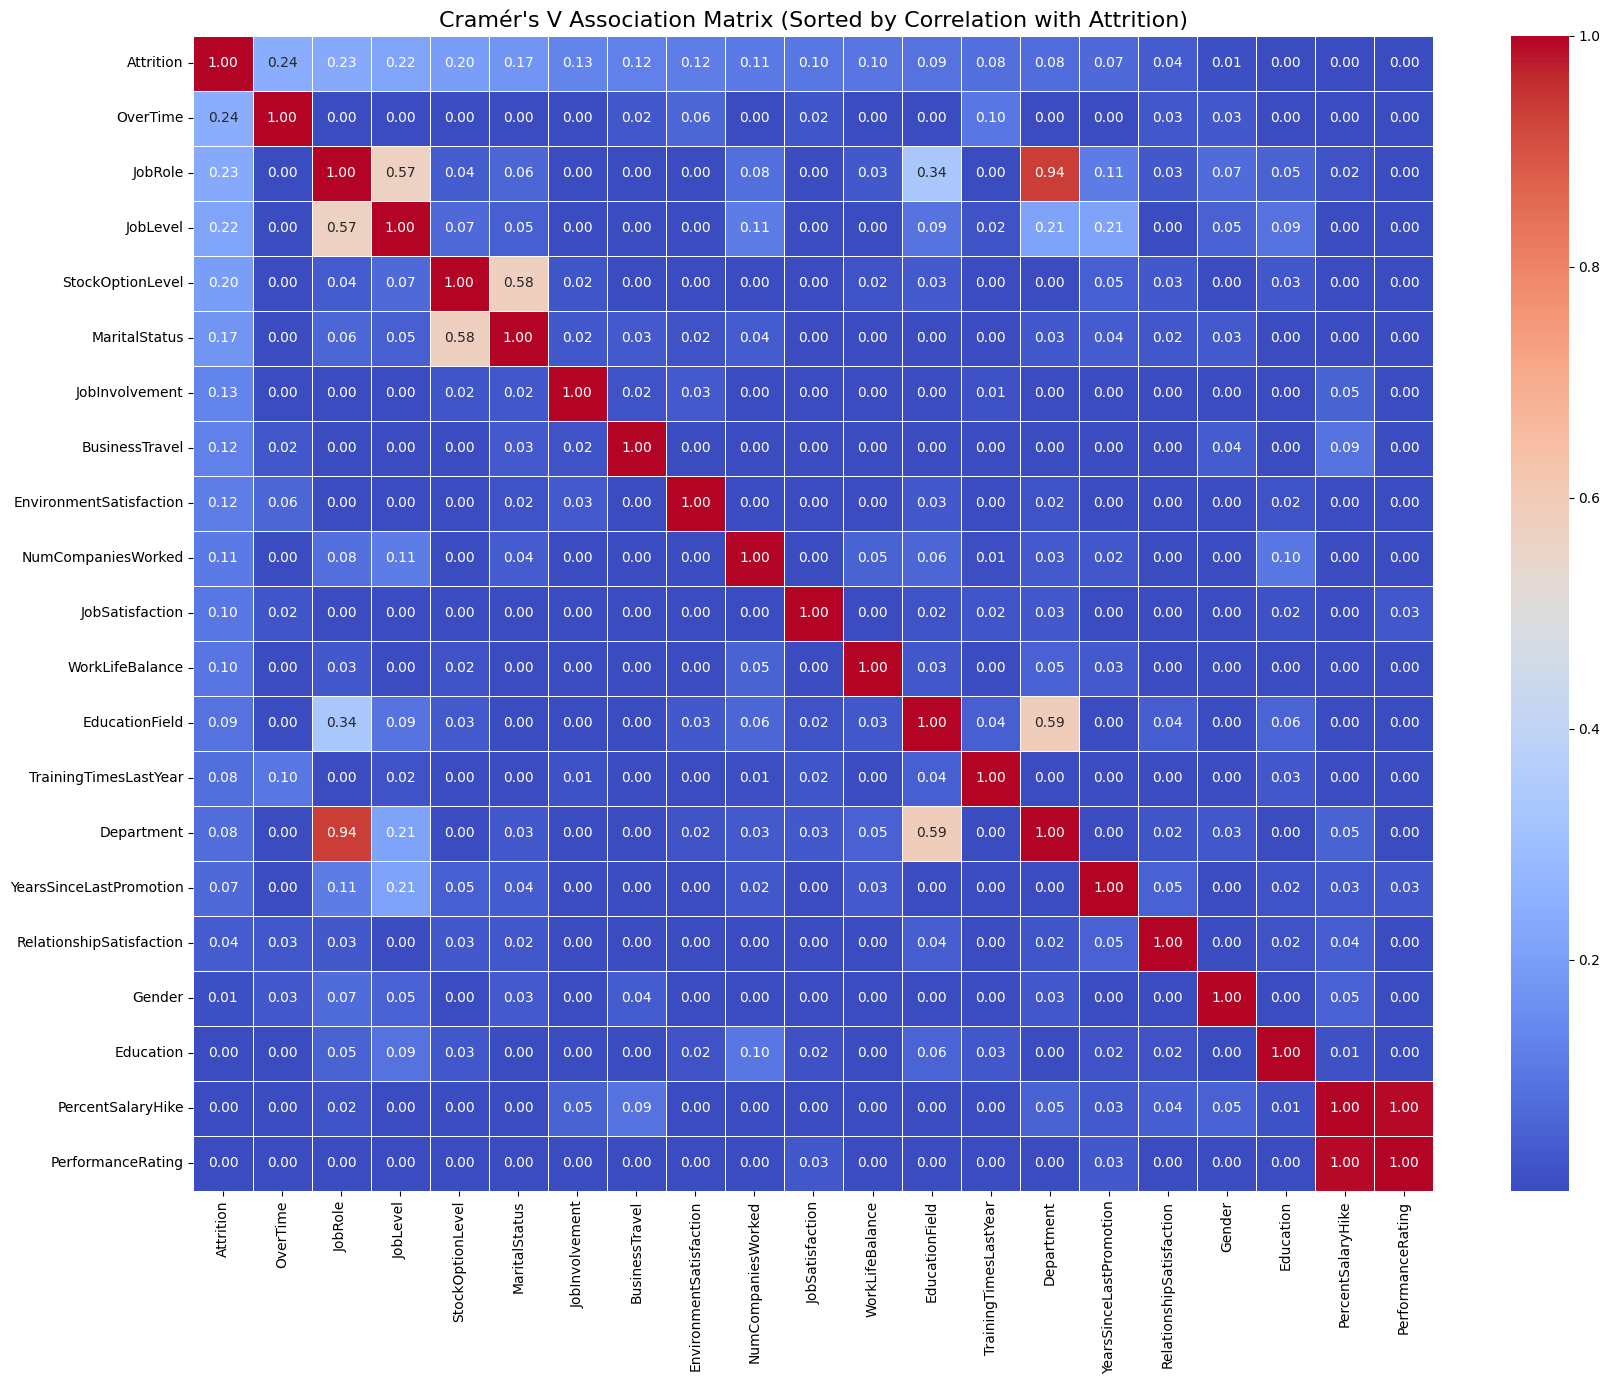

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# --- Function to Calculate Cramér's V (Unchanged) ---
def cramers_v(x, y):
    """
    Calculates Cramér's V for categorical-categorical association.
    Uses correction for bias.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    # The + 1e-9 is to avoid division by zero in case of perfect association
    v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)) + 1e-9)
    return v

# --- Calculate the Cramér's V matrix (Unchanged) ---
# Assumes 'df' is your DataFrame and 'categorical_columns' is your list of columns.
cramers_matrix = pd.DataFrame(
    np.zeros((len(categorical_columns), len(categorical_columns))),
    columns=categorical_columns,
    index=categorical_columns
)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_matrix.loc[col1, col2] = 1.0
        else:
            v = cramers_v(df[col1], df[col2])
            cramers_matrix.loc[col1, col2] = v
            cramers_matrix.loc[col2, col1] = v

# --- NEW: Sort the matrix by the first column in descending order ---
# Get the name of the first column (your target variable)
target_variable = cramers_matrix.columns[0]

# Get the correlations with the target variable
correlations_with_target = cramers_matrix[target_variable]

# Sort these correlations in descending order and get the new order of columns
sorted_columns = correlations_with_target.sort_values(ascending=False).index

# Reorder the matrix using the new column order
cramers_matrix_sorted = cramers_matrix.loc[sorted_columns, sorted_columns]


# --- Visualize the SORTED matrix as a heatmap ---
plt.figure(figsize=(20, 15))
sns.heatmap(
    cramers_matrix_sorted, # Use the sorted matrix here
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=.5
)
plt.title(f"Cramér's V Association Matrix (Sorted by Correlation with {target_variable})", fontsize=16)
plt.show()

There is **very big correlation** between JobRole and Department. Since JobRole is more important Department column will be excluded from the data.

In [17]:
# Categorical columns (object/string)
categorical_columns = [
    "Attrition",
    "BusinessTravel",
    # "Department",
    "Education",
    "EducationField",
    "EnvironmentSatisfaction",
    "Gender",
    "JobRole",
    "JobLevel",    
    "JobSatisfaction",
    "JobInvolvement",    
    "MaritalStatus",
    "NumCompaniesWorked",    
    "OverTime",
    "PerformanceRating",
    "PercentSalaryHike", 
    "RelationshipSatisfaction",    
    "StockOptionLevel",
    "WorkLifeBalance",
    "TrainingTimesLastYear", 
    "YearsSinceLastPromotion"  
]

In [18]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# drop_first=True avoids multicollinearity by dropping the first category in each column.

# Find all columns in df_encoded that were not in the original df
encoded_columns = [col for col in df_encoded.columns if col not in df.columns]

# Encoded columns
df_encoded[encoded_columns].head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,YearsSinceLastPromotion_6,YearsSinceLastPromotion_7,YearsSinceLastPromotion_8,YearsSinceLastPromotion_9,YearsSinceLastPromotion_10,YearsSinceLastPromotion_11,YearsSinceLastPromotion_12,YearsSinceLastPromotion_13,YearsSinceLastPromotion_14,YearsSinceLastPromotion_15
0,True,False,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# Scaled numerical columns
df_encoded[scaled_cols].head()

,scaled_Age,scaled_DailyRate,scaled_DistanceFromHome_log,scaled_HourlyRate,scaled_MonthlyIncome_log,scaled_MonthlyRate,scaled_YearsWithCurrManager_log,scaled_rate_daily_hourly_ratio,scaled_income_rate_ratio,scaled_manager_tenure_ratio,scaled_age_log_income_interaction,scaled_sum_of_rates
0,0.446350,0.742527,-1.505350,1.383138,0.219493,0.726020,0.547996,-0.209871,-0.429447,0.820959,0.403838,0.772260
1,1.322365,-1.297775,0.252002,-0.240677,-0.014600,1.488876,0.904924,-1.023840,-0.550256,0.422495,1.065185,1.414976
2,0.008343,1.414363,-1.031607,1.284725,-1.366318,-1.674841,-1.675043,0.154499,0.241275,-1.669441,-0.383318,-1.591394
3,-0.429664,1.461466,-0.695482,-0.486709,-0.868626,1.243211,-1.675043,1.285374,-0.645712,-1.669441,-0.593285,1.325007
4,-1.086676,-0.524295,-1.031607,-1.274014,-0.604032,0.325900,-0.311993,0.137546,-0.547230,1.319038,-1.053365,0.292613


### 9. Prepare X and y, then split into Train/Test

In [20]:
# 1) Import train_test_split
from sklearn.model_selection import train_test_split

# 2) Define target
#    After one-hot encoding with drop_first=True, the Attrition target is in the dummy column "Attrition_Yes"
y = df_encoded["Attrition_Yes"]

# 3) Define feature columns
#    Combine scaled numerical cols with all encoded (dummy) cols except the target
feature_cols = scaled_cols + [col for col in encoded_columns if col != "Attrition_Yes"]

# 4) Build feature matrix
X = df_encoded[feature_cols]

# 5) Split into 80% train / 20% test
# Use a stratified train/test split so that both sets preserve the 83/17 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.20, 
    random_state=42, 
    stratify=y      # preserves class balance
)

# 6) Quick sanity‐check
print("X_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)

for name, y in [("Train", y_train), ("Test", y_test)]:
    # build a DataFrame of counts + percents
    dist = y.value_counts().to_frame("count")
    dist["percent"] = y.value_counts(normalize=True).map("{:.2%}".format)

    # print out
    print(f"{name} set")
    print(dist)
    print()

X_train shape: (1176, 102)
X_test  shape: (294, 102)
Train set
               count percent
Attrition_Yes               
False            986  83.84%
True             190  16.16%

Test set
               count percent
Attrition_Yes               
False            247  84.01%
True              47  15.99%



### 10. Machine-learning classification algorithms

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier (e.g. XGBoost, LightGBM, CatBoost)
- AdaBoost Classifier
- Extra Trees Classifier
- Support Vector Machine (SVC / LinearSVC)
- k-Nearest Neighbors Classifier
- Naive Bayes (GaussianNB, BernoulliNB)
- Linear Discriminant Analysis
- Quadratic Discriminant Analysis
- Stochastic Gradient Descent Classifier
- Multi-layer Perceptron (Neural Network)
- Ridge Classifier
- Passive Aggressive Classifier
- Bagging Classifier
- Voting Classifier (Ensemble)
- Stacking Classifier (Ensemble)

### Resampling
incorporate resampling (e.g. SMOTE, undersampling or a combined approach) in your model pipelines to balance the classes before training.

### Evaluation Metrics
Don’t rely on accuracy given the class imbalance. Focus on:

- Precision / Recall (especially recall if you want to catch as many “Yes” cases as possible).
- F1-score (harmonic mean of precision & recall).
- ROC-AUC and PR-AUC (precision-recall curve area is especially informative in imbalanced settings).
- Confusion matrix to see false negatives vs. false positives in business context.

In [21]:
from models import ModelTrainer
trainer = ModelTrainer(resampling_strategy="smote_tomek", random_state=42)
results = trainer.train_and_evaluate(X_train, X_test, y_train, y_test)

c:\JYP\LinkedIn\Portfolio\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:34:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [22]:
results.head(20)

,precision,recall,f1_score,roc_auc,pr_auc,True_negative,False_negative,True_positive,False_positive
model,,,,,,,,,
LogisticRegression,0.440,0.234,0.306,0.767,0.422,79.252,12.245,3.741,4.762
DecisionTree,0.280,0.298,0.289,0.576,0.196,71.769,11.224,4.762,12.245
RandomForest,0.444,0.255,0.324,0.763,0.417,78.912,11.905,4.082,5.102
GradientBoosting,0.514,0.383,0.439,0.741,0.435,78.231,9.864,6.122,5.782
AdaBoost,0.432,0.404,0.418,0.751,0.432,75.510,9.524,6.463,8.503
ExtraTrees,0.583,0.149,0.237,0.759,0.442,82.313,13.605,2.381,1.701
SVC,0.462,0.128,0.200,0.751,0.390,81.633,13.946,2.041,2.381
LinearSVC,0.562,0.191,0.286,0.709,0.397,81.633,12.925,3.061,2.381
PassiveAggressive,0.476,0.213,0.294,0.735,0.433,80.272,12.585,3.401,3.741


### 11. Hyperparameter tuning

The best way to approach this is to use Scikit-learn's built-in tools for hyperparameter searching. The two most common methods are:

 - **Grid Search** (GridSearchCV): This method exhaustively tries every possible combination of the parameters you specify. It's very thorough but can be slow.
 - **Random Search** (RandomizedSearchCV): This method randomly samples a fixed number of parameter combinations from a range of values. It's much faster than Grid Search and often finds results that are just as good, or even better.

In [23]:
# This cell takes a significant amount of time to run, as it is performing
# a comprehensive hyperparameter search for every model.

from models import ModelTrainer
import pandas as pd

# 1. Instantiate the ModelTrainer class
# We use the same configuration as the baseline run for a fair comparison.
trainer = ModelTrainer(resampling_strategy="smote_tomek", random_state=42)

# 2. Run the automated tuning and evaluation process
# This single function call handles everything:
#   - Iterates through all models defined in the class.
#   - Runs RandomizedSearchCV with 50 iterations and 5-fold cross-validation.
#   - Optimizes for the 'roc_auc' score.
#   - Evaluates the best found model on the test set.
#   - Returns a single, clean DataFrame with the results.
tuned_results_df = trainer.tune_and_evaluate(
    X_train,
    X_test,
    y_train,
    y_test,
    n_iter=50,
    scoring='roc_auc'
)

# 3. Display the final, sorted results
# print("\n--- Final Tuned Model Performance (Sorted by ROC-AUC) ---")
display(tuned_results_df)

,precision,recall,f1_score,roc_auc,pr_auc,True_negative,False_negative,True_positive,False_positive,best_params
model,,,,,,,,,,
MLP,0.472,0.362,0.410,0.819,0.504,77.551,10.204,5.782,6.463,"{'clf__learning_rate_init': 0.001, 'clf__hidde..."
RandomForest,0.464,0.277,0.347,0.779,0.432,78.912,11.565,4.422,5.102,"{'clf__n_estimators': 100, 'clf__min_samples_s..."
LinearSVC,0.472,0.362,0.410,0.776,0.448,77.551,10.204,5.782,6.463,"{'clf__estimator__max_iter': 2000, 'clf__estim..."
SVC,0.318,0.149,0.203,0.776,0.423,78.912,13.605,2.381,5.102,"{'clf__kernel': 'rbf', 'clf__gamma': 'auto', '..."
LogisticRegression,0.379,0.234,0.289,0.765,0.421,77.891,12.245,3.741,6.122,"{'clf__solver': 'saga', 'clf__penalty': 'l1', ..."
AdaBoost,0.396,0.447,0.420,0.765,0.467,73.129,8.844,7.143,10.884,"{'clf__n_estimators': 200, 'clf__learning_rate..."
ExtraTrees,0.750,0.191,0.305,0.759,0.432,82.993,12.925,3.061,1.020,"{'clf__n_estimators': 200, 'clf__min_samples_s..."
CatBoost,0.515,0.362,0.425,0.750,0.471,78.571,10.204,5.782,5.442,"{'clf__learning_rate': 0.01, 'clf__iterations'..."
LightGBM,0.586,0.362,0.447,0.741,0.479,79.932,10.204,5.782,4.082,"{'clf__num_leaves': 20, 'clf__n_estimators': 5..."


### Best performing models

- Based on ROC-AUC bets performing models are: MLP and SVC.

In [24]:
# Get the best parameters for all models
all_best_params = trainer.best_params_

# Get the best parameters for a specific model
rf_params = trainer.best_params_['MLP']

print(rf_params)

{'clf__learning_rate_init': 0.001, 'clf__hidden_layer_sizes': (100,), 'clf__alpha': 0.01, 'clf__activation': 'tanh'}


### 12. Statistical Validation

In [27]:
# =========================================================
# Statistical validation: McNemar + paired t-test
# =========================================================
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import ttest_rel
from sklearn.model_selection import cross_val_score, StratifiedKFold

# ---------------------------------------------------------
# 1. Helper: refit / retrieve best estimator for a model
# ---------------------------------------------------------
def get_best_estimator(trainer, model_name):
    """
    Retrieves the best-performing, pre-fitted model pipeline from the trainer's cache.
    
    Args:
        trainer (ModelTrainer): The trainer instance after tune_and_evaluate has been run.
        model_name (str): The name of the model to retrieve (e.g., 'RandomForest').
        
    Returns:
        The fitted Scikit-learn pipeline object.
    """
    if model_name not in trainer.best_estimators_:
        raise ValueError(f"Estimator for {model_name} not found. "
                         "Ensure 'tune_and_evaluate' has been run successfully.")
    
    print(f"Returning pre-fitted '{model_name}' model from cache.")
    return trainer.best_estimators_[model_name]

# ---------------------------------------------------------
# 2. McNemar’s test on the test set
# ---------------------------------------------------------
def mcnemar_test(model_a, model_b, X_test, y_test):
    """
    Prints McNemar’s test comparing two fitted models.
    """
    pred_a = model_a.predict(X_test)
    pred_b = model_b.predict(X_test)

    # Contingency table components
    a_correct_b_wrong = np.sum((pred_a == y_test) & (pred_b != y_test))
    b_correct_a_wrong = np.sum((pred_b == y_test) & (pred_a != y_test))
    table = [[0, a_correct_b_wrong],
             [b_correct_a_wrong, 0]]

    result = mcnemar(table, exact=True)
    print(f"McNemar’s test p-value: {result.pvalue:.4f}")
    return result

# ---------------------------------------------------------
# 3. Paired t-test on k-fold cross-validated scores
# ---------------------------------------------------------
def paired_ttest(model_a, model_b, X, y, scoring="f1", n_splits=5, random_state=42):
    """
    Performs paired t-test on cross-validated scores of two models.
    """
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    scores_a = cross_val_score(model_a, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    scores_b = cross_val_score(model_b, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    
    t_stat, p_val = ttest_rel(scores_a, scores_b)
    print(f"{scoring} paired t-test: t={t_stat:.3f}   p={p_val:.4f}")
    return scores_a, scores_b, t_stat, p_val

models_to_compare = ["MLP", "RandomForest"]          

# Fit / retrieve best estimators
model_A = get_best_estimator(trainer, models_to_compare[0])
model_B = get_best_estimator(trainer, models_to_compare[1])

print("== McNemar test on hold-out set ==")
mcnemar_test(model_A, model_B, X_test, y_test)

print("\n== Paired t-test on 5-fold CV (roc_auc) ==")
paired_ttest(model_A, model_B, X_train, y_train, scoring="roc_auc")

Returning pre-fitted 'MLP' model from cache.
Returning pre-fitted 'RandomForest' model from cache.
== McNemar test on hold-out set ==
McNemar’s test p-value: 1.0000

== Paired t-test on 5-fold CV (roc_auc) ==
roc_auc paired t-test: t=1.886   p=0.1323


(array([0.79425837, 0.78039006, 0.86935613, 0.7940155 , 0.76743254]),
 array([0.72959862, 0.72749132, 0.78987443, 0.82246861, 0.7523377 ]),
 np.float64(1.8862594279720963),
 np.float64(0.13232086873255258))

### 13. Confusion Matrix Analysis 

For each top model, examine the confusion matrix on the test set. Pay special attention to false negatives (missed attrition cases) and false positives (incorrectly flagged attrition).

Returning pre-fitted 'MLP' model from cache.
Returning pre-fitted 'RandomForest' model from cache.



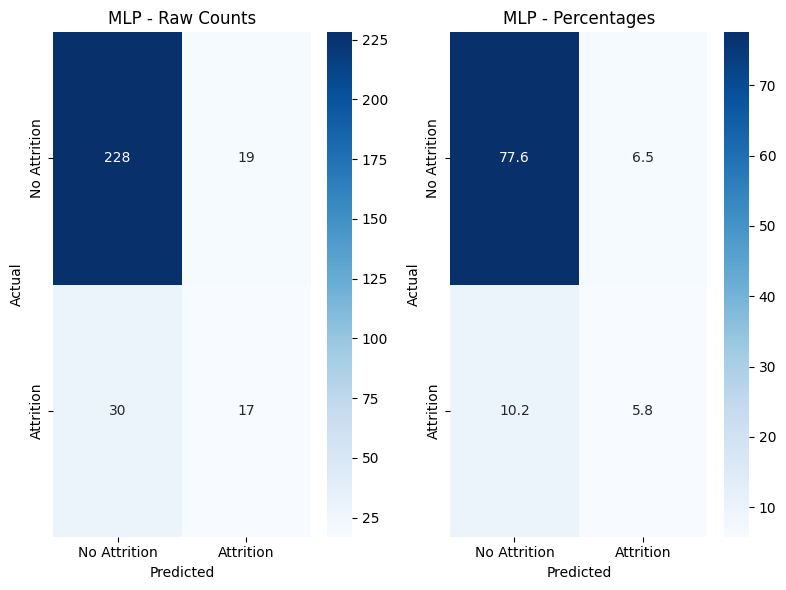


=== MLP Confusion Matrix Analysis ===
Total test samples: 294

📊 BREAKDOWN:
True Negatives (TN):  228 ( 77.6%) - Correctly identified non-attrition
False Positives (FP):  19 (  6.5%) - Incorrectly flagged as attrition
False Negatives (FN):  30 ( 10.2%) - Missed actual attrition cases
True Positives (TP):   17 (  5.8%) - Correctly identified attrition

🚨 BUSINESS IMPACT:
• False Negatives (30 cases): These are employees who will leave but weren't flagged
  → Risk: Lost talent, unexpected departures, knowledge drain
  → Cost: Recruitment, training, productivity loss
• False Positives (19 cases): Employees flagged as flight risk who won't leave
  → Risk: Unnecessary retention efforts, potential employee concern
  → Cost: Wasted retention budget, possible morale impact

📈 KEY METRICS:
• Recall (Sensitivity): 0.362 - Catches 36.2% of actual attrition
• Precision: 0.472 - 47.2% of flagged cases are true attrition



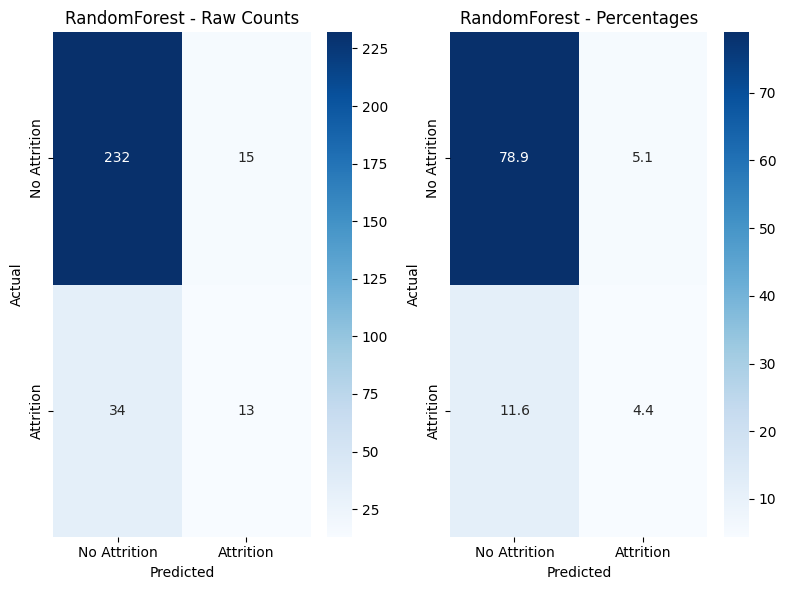


=== RandomForest Confusion Matrix Analysis ===
Total test samples: 294

📊 BREAKDOWN:
True Negatives (TN):  232 ( 78.9%) - Correctly identified non-attrition
False Positives (FP):  15 (  5.1%) - Incorrectly flagged as attrition
False Negatives (FN):  34 ( 11.6%) - Missed actual attrition cases
True Positives (TP):   13 (  4.4%) - Correctly identified attrition

🚨 BUSINESS IMPACT:
• False Negatives (34 cases): These are employees who will leave but weren't flagged
  → Risk: Lost talent, unexpected departures, knowledge drain
  → Cost: Recruitment, training, productivity loss
• False Positives (15 cases): Employees flagged as flight risk who won't leave
  → Risk: Unnecessary retention efforts, potential employee concern
  → Cost: Wasted retention budget, possible morale impact

📈 KEY METRICS:
• Recall (Sensitivity): 0.277 - Catches 27.7% of actual attrition
• Precision: 0.464 - 46.4% of flagged cases are true attrition

=== SUMMARY COMPARISON ===
Model                FN (Missed)  FP (Fal

In [30]:
# =========================================================
# Confusion Matrix Analysis for Top Models
# =========================================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def analyze_confusion_matrix(model, model_name, X_test, y_test, figsize=(8, 6)):
    """
    Creates and analyzes confusion matrix for a given model.
    Provides business interpretation of FN and FP.
    """
    # Get predictions
    y_pred = model.predict(X_test)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate percentages
    total = len(y_test)
    tn_pct = (tn / total) * 100
    fp_pct = (fp / total) * 100
    fn_pct = (fn / total) * 100
    tp_pct = (tp / total) * 100
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Raw counts
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
                xticklabels=['No Attrition', 'Attrition'],
                yticklabels=['No Attrition', 'Attrition'])
    ax1.set_title(f'{model_name} - Raw Counts')
    ax1.set_ylabel('Actual')
    ax1.set_xlabel('Predicted')
    
    # Percentages
    cm_pct = np.array([[tn_pct, fp_pct], [fn_pct, tp_pct]])
    sns.heatmap(cm_pct, annot=True, fmt='.1f', cmap='Blues', ax=ax2,
                xticklabels=['No Attrition', 'Attrition'],
                yticklabels=['No Attrition', 'Attrition'])
    ax2.set_title(f'{model_name} - Percentages')
    ax2.set_ylabel('Actual')
    ax2.set_xlabel('Predicted')
    
    plt.tight_layout()
    plt.show()
    
    # Business interpretation
    print(f"\n=== {model_name} Confusion Matrix Analysis ===")
    print(f"Total test samples: {total}")
    print(f"\n📊 BREAKDOWN:")
    print(f"True Negatives (TN):  {tn:3d} ({tn_pct:5.1f}%) - Correctly identified non-attrition")
    print(f"False Positives (FP): {fp:3d} ({fp_pct:5.1f}%) - Incorrectly flagged as attrition")
    print(f"False Negatives (FN): {fn:3d} ({fn_pct:5.1f}%) - Missed actual attrition cases")
    print(f"True Positives (TP):  {tp:3d} ({tp_pct:5.1f}%) - Correctly identified attrition")
    
    print(f"\n🚨 BUSINESS IMPACT:")
    print(f"• False Negatives ({fn} cases): These are employees who will leave but weren't flagged")
    print(f"  → Risk: Lost talent, unexpected departures, knowledge drain")
    print(f"  → Cost: Recruitment, training, productivity loss")
    
    print(f"• False Positives ({fp} cases): Employees flagged as flight risk who won't leave")
    print(f"  → Risk: Unnecessary retention efforts, potential employee concern")
    print(f"  → Cost: Wasted retention budget, possible morale impact")
    
    # Calculate key ratios
    if (tp + fn) > 0:
        recall = tp / (tp + fn)
        print(f"\n📈 KEY METRICS:")
        print(f"• Recall (Sensitivity): {recall:.3f} - Catches {recall*100:.1f}% of actual attrition")
    
    if (tp + fp) > 0:
        precision = tp / (tp + fp)
        print(f"• Precision: {precision:.3f} - {precision*100:.1f}% of flagged cases are true attrition")
    
    return {
        'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp,
        'tn_pct': tn_pct, 'fp_pct': fp_pct, 'fn_pct': fn_pct, 'tp_pct': tp_pct
    }

def compare_confusion_matrices(models_dict, X_test, y_test):
    """
    Compare confusion matrices across multiple models.
    """
    results = {}
    
    for name, model in models_dict.items():
        print(f"\n{'='*60}")
        results[name] = analyze_confusion_matrix(model, name, X_test, y_test)
    
    # Summary comparison
    print(f"\n{'='*60}")
    print("=== SUMMARY COMPARISON ===")
    print(f"{'Model':<20} {'FN (Missed)':<12} {'FP (False Alarm)':<16} {'Recall':<8} {'Precision':<10}")
    print("-" * 70)
    
    for name, metrics in results.items():
        fn, fp, tp = metrics['fn'], metrics['fp'], metrics['tp']
        recall = tp / (tp + metrics['fn']) if (tp + metrics['fn']) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        print(f"{name:<20} {fn:<12} {fp:<16} {recall:<8.3f} {precision:<10.3f}")
    
    return results

# =========================================================
# ANALYZE TOP MODELS
# =========================================================

# Define your top models (change these based on your results)
top_models = ["MLP", "RandomForest"]  # Add/remove as needed

# Get fitted models
fitted_models = {}
for model_name in top_models:
    fitted_models[model_name] = get_best_estimator(trainer, model_name)

# Run the analysis
comparison_results = compare_confusion_matrices(fitted_models, X_test, y_test)

### 14. Interpreting the MLP Model

### Permutation Importance 

For the selected model(s), analyze feature importance. This helps validate that the model is making reasonable decisions and provides insights for stakeholders.

Calculating permutation importance... (This may take a minute)
Returning pre-fitted 'MLP' model from cache.
Calculation complete.


<Figure size 1000x800 with 0 Axes>

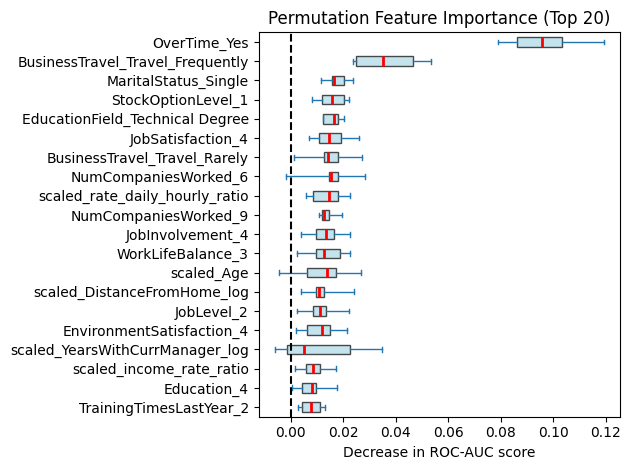


Top 20 Most Important Features:
                         feature  importance_mean
                    OverTime_Yes         0.096003
BusinessTravel_Travel_Frequently         0.036472
            MaritalStatus_Single         0.017693
              StockOptionLevel_1         0.015867
 EducationField_Technical Degree         0.015729
               JobSatisfaction_4         0.015376
    BusinessTravel_Travel_Rarely         0.015221
            NumCompaniesWorked_6         0.014971
  scaled_rate_daily_hourly_ratio         0.014024
            NumCompaniesWorked_9         0.013464
                JobInvolvement_4         0.013429
               WorkLifeBalance_3         0.013222
                      scaled_Age         0.012413
     scaled_DistanceFromHome_log         0.011603
                      JobLevel_2         0.011250
       EnvironmentSatisfaction_4         0.011198
 scaled_YearsWithCurrManager_log         0.010397
        scaled_income_rate_ratio         0.008709
                 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# --- Step 1: Calculate Permutation Importance ---
# We will run this on the test set to see what features the model uses for generalization.
# n_repeats=10 provides a more stable importance score by shuffling each feature 10 times.
print("Calculating permutation importance... (This may take a minute)")

best_model = get_best_estimator(trainer, "MLP")

result = permutation_importance(
    best_model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
    scoring='roc_auc' # Using roc_auc as it was a key metric
)

print("Calculation complete.")

# --- Step 2: Process and Sort the Results ---
# The results are in a dictionary. Let's put them into a clean DataFrame.
sorted_importances_idx = result.importances_mean.argsort()

importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)

# --- Step 3: Visualize the Top 20 Features ---
# Plotting all 104 features would be unreadable, so let's show the top 20.
top_n = 20
top_features = importances.columns[-top_n:]
top_importances = importances[top_features]

plt.figure(figsize=(10, 8))
ax = top_importances.plot.box(
    vert=False,
    whis=10,
    showfliers=False, # Hides outlier points from the 10 repeats for clarity
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', alpha=0.7),
    medianprops=dict(color='red', linewidth=2)
)
ax.set_title("Permutation Feature Importance (Top 20)")
ax.set_xlabel("Decrease in ROC-AUC score")
ax.axvline(x=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()

# --- Optional: Display the top features as a sorted list ---
print("\nTop 20 Most Important Features:")
top_features_df = pd.DataFrame({
    'feature': X_test.columns[sorted_importances_idx][-top_n:],
    'importance_mean': result.importances_mean[sorted_importances_idx][-top_n:]
}).sort_values(by='importance_mean', ascending=False)

print(top_features_df.to_string(index=False))

#### SHAP Explainer

In [32]:
import pandas as pd
import numpy as np
import shap
import warnings # Import the warnings module

# --- Prerequisite: Assume these variables are already defined ---
# X_train, X_test
best_model = get_best_estimator(trainer, "MLP")
# -------------------------------------------------------------


# --- Step 1: Prepare for SHAP Explainer ---
print("Creating a background dataset for SHAP...")
background_data = shap.sample(X_train, 100, random_state=42)

# --- THIS IS THE CORRECTED LINE ---
# Use .predict_proba for MLP and most other classifiers
predict_fn = lambda x: best_model.predict_proba(x)

explainer = shap.KernelExplainer(predict_fn, background_data)


# --- Step 2: Calculate SHAP Values (Fast and Clean) ---
print("Creating a sample of the test set for faster calculation...")
X_test_sample = X_test.sample(200, random_state=42)

print("Calculating SHAP values on the test set sample...")

with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
    shap_values = explainer.shap_values(X_test_sample)

print("Calculation complete.")


# --- Step 3: Create and Display Text Summary ---
# For binary classification, shap_values is a list of two arrays [class_0, class_1].
# We are interested in the explanation for the "positive" class (Attrition=Yes), which is the second one.
mean_abs_shap_values = np.abs(shap_values[1]).mean(axis=0)

# Get the SHAP values for the "positive" class (class 1) across all samples and features.
# The shape of shap_values is (n_samples, n_features, n_classes), so we slice along the last dimension.
shap_values_for_positive_class = shap_values[:, :, 1]

# To get a global measure, we take the mean of the absolute SHAP values for each feature.
mean_abs_shap_values = np.abs(shap_values_for_positive_class).mean(axis=0)

# Create the DataFrame (this will now work as both arrays have length 104).
feature_importance_df = pd.DataFrame({
    'Feature': X_test_sample.columns,
    'SHAP_Importance': mean_abs_shap_values
})

sorted_feature_importance = feature_importance_df.sort_values(
    by='SHAP_Importance',
    ascending=False
)

print("\n### SHAP Global Feature Importance (MLP Model) ###")
print("Features are ranked by their average impact on the model's output magnitude.")
print("-" * 60)
print(sorted_feature_importance.head(20).to_string(index=False))

c:\JYP\LinkedIn\Portfolio\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\JYP\LinkedIn\Portfolio\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Returning pre-fitted 'MLP' model from cache.
Creating a background dataset for SHAP...
Creating a sample of the test set for faster calculation...
Calculating SHAP values on the test set sample...


100%|██████████| 200/200 [06:43<00:00,  2.02s/it]

Calculation complete.

### SHAP Global Feature Importance (MLP Model) ###
Features are ranked by their average impact on the model's output magnitude.
------------------------------------------------------------
                         Feature  SHAP_Importance
                    OverTime_Yes         0.076076
BusinessTravel_Travel_Frequently         0.051509
 scaled_YearsWithCurrManager_log         0.022957
         JobRole_Sales Executive         0.021198
                      scaled_Age         0.017741
               JobSatisfaction_4         0.016920
   JobRole_Laboratory Technician         0.016832
       EnvironmentSatisfaction_4         0.013652
    BusinessTravel_Travel_Rarely         0.013271
                scaled_DailyRate         0.012729
     scaled_DistanceFromHome_log         0.012140
        scaled_MonthlyIncome_log         0.011846
            NumCompaniesWorked_6         0.011240
              StockOptionLevel_1         0.010415
    JobRole_Sales Representative      

### SHAP Feature Importance

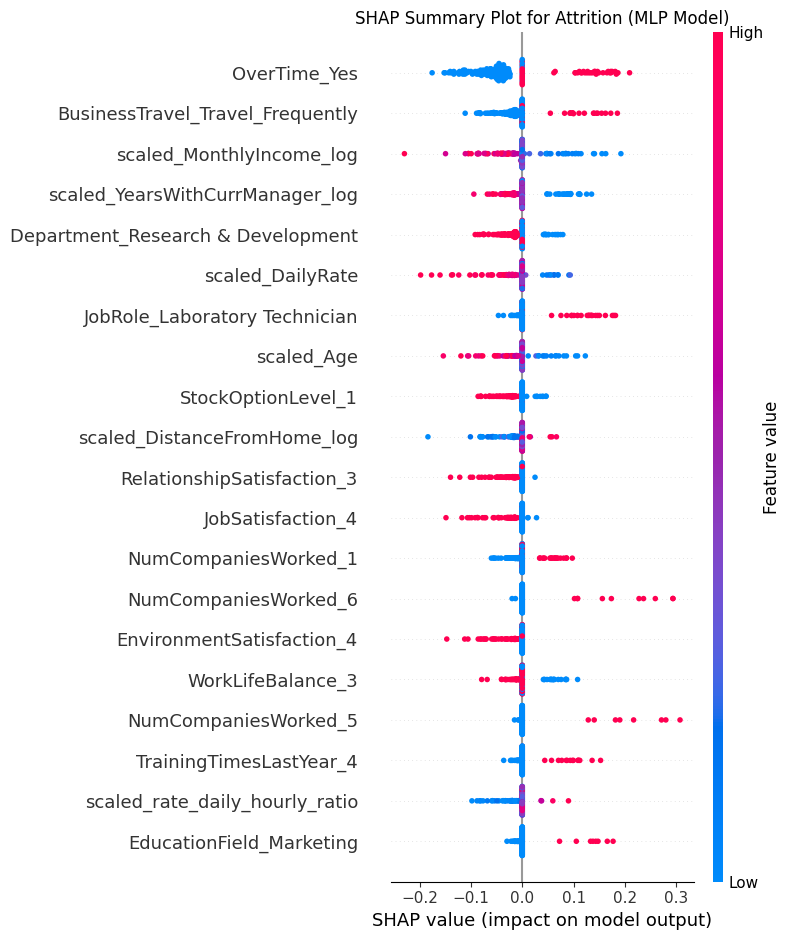

In [ ]:
import shap
import matplotlib.pyplot as plt

# --- Corrected Code ---

# Create the summary plot for the positive class (Attrition=Yes).
# We slice the shap_values array to get the values for class 1.
# The shape of shap_values is (samples, features, classes), so we use [:, :, 1].
shap.summary_plot(
    shap_values[:, :, 1],
    X_test_sample,
    feature_names=X_test_sample.columns,
    show=False
)

plt.title("SHAP Summary Plot for Attrition (MLP Model)")
plt.tight_layout()
plt.show()

### How to Read This Plot

*   **Feature Importance:** Features are ranked from most important (top) to least important (bottom).
*   **Impact on Prediction:** The x-axis is the SHAP value.
    *   Dots on the **right side** (positive SHAP values) show that the feature pushed the model's prediction **towards Attrition (Yes)**.
    *   Dots on the **left side** (negative SHAP values) show that the feature pushed the prediction **away from Attrition (No)**.
*   **Feature Value:** The color of the dot shows the feature's original value.
    *   **Red dots** represent a **high value** for that feature.
    *   **Blue dots** represent a **low value** for that feature.

### Interpretation of Key Features

1.  **`OverTime_Yes` (Your Main Question):**
    *   **Observation:** There is a very clear separation. All the red dots are on the right, and all the blue dots are on the left.
    *   **Meaning:**
        *   When `OverTime_Yes` is high (red, value=1), it has a large positive SHAP value. This means **working overtime strongly increases the model's prediction that an employee will leave.**
        *   When `OverTime_Yes` is low (blue, value=0), it has a large negative SHAP value. This means **not working overtime strongly pushes the prediction towards retention.**
    *   **Conclusion:** You can now say with certainty that your MLP model has learned that working overtime is the single biggest driver of attrition.

2.  **`BusinessTravel_Travel_Frequently`:**
    *   **Observation:** The red dots (high value for frequent travel) are mostly on the right side.
    *   **Conclusion:** Traveling frequently increases the predicted risk of attrition.

3.  **`scaled_MonthlyIncome_log`:**
    *   **Observation:** This is reversed. The blue dots (low income) are on the right, and the red dots (high income) are on the left.
    *   **Conclusion:** Having a lower monthly income increases the predicted risk of attrition, while a higher income is a factor for retention. This makes perfect business sense.

4.  **`scaled_YearsWithCurrManager_log`:**
    *   **Observation:** Similar to income, the blue dots (fewer years with the manager) are on the right.
    *   **Conclusion:** A shorter tenure with the current manager increases the predicted risk of attrition.

In summary, this plot gives a rich, detailed story. The model has learned that employees who work overtime, travel frequently, have lower incomes, and are relatively new to their managers are the most likely to leave.